In [4]:
import selenium
import pandas as pd

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException,StaleElementReferenceException
import requests
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time


 Write a python program which searches all the product under a particular product from www.amazon.in. The 
product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for 
guitars. 

In [27]:
driver=webdriver.Chrome()
driver.get('https://www.amazon.co.uk/?&tag=hydraamazonav-21&ref=pd_sl_781ozcfkw8_e&adgrpid=154598701155&hvpone=&hvptwo=&hvadid=674801713863&hvpos=&hvnetw=g&hvrand=15954563710324291692&hvqmt=e&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9045968&hvtargid=kwd-10573980&hydadcr=13724_2323348')

In [28]:
input_user = input('Enter the product that we want to search : ')

Enter the product that we want to search : guitar


In [29]:
product_search = driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")
product_search.send_keys(input_user)

In [ ]:
search = driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
search.click()

In the above question, now scrape the following details of each product listed in first 3 pages of your search 
results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then 
scrape all the products available under that product name. Details to be scraped are: "Brand 
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and 
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“. 

In [31]:
BRAND_NAME=[]
NAME_OF_PRODUCT=[]
PRICE=[]
RETURN_EXCHANGE=[]
EXPECTED_DELIVERY=[]
AVAIBILITY=[]
PRODUCT_URL=[]

In [32]:
start=0
end=3
for page in range(start,end):
    URL=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in URL:
        PRODUCT_URL.append(i.get_attribute('href'))

    for i in PRODUCT_URL:
        driver.get(i)
        time.sleep(1)
        try:
            NAME=driver.find_element(By.XPATH,'/html/body/div[2]/div/div[7]/div[4]/div[4]/div[44]/div/div[1]/div/table/tbody/tr[1]/td[2]/span')
            BRAND_NAME.append(NAME.text)
        except NoSuchElementException:
            BRAND_NAME.append('-')

        try:
            PRODUCTNAME=driver.find_element(By.XPATH,'/html/body/div[2]/div/div[7]/div[4]/div[4]/div[1]/div/h1/span')
            NAME_OF_PRODUCT.append(PRODUCTNAME.text)
        except NoSuchElementException:
            NAME_OF_PRODUCT.append('-')

        try:
            RATE=driver.find_element(By.XPATH,'/html/body/div[2]/div/div[7]/div[4]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[1]/div/div/span[1]')
            PRICE.append(RATE.text)
        except NoSuchElementException:
            PRICE.append('-')

        try:
            RETURN=driver.find_element(By.XPATH,'/html/body/div[2]/div/div[7]/div[4]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[4]/div/div[20]/div[1]/div/div[1]/div[1]/div[4]/div[2]/span/a/span')
            RETURN_EXCHANGE.append(RETURN.text)
        except NoSuchElementException:
            RETURN_EXCHANGE.append('-')

        try:
            AVAILABLE=driver.find_element(By.XPATH,'/html/body/div[2]/div/div[7]/div[4]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[4]/div/div[6]/div/div[1]/span')
            AVAIBILITY.append(AVAILABLE.text)
        except NoSuchElementException:
            AVAIBILITY.append('-')

        try:
            DELIVERY=driver.find_element(By.XPATH,'/html/body/div[2]/div/div[7]/div[4]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[4]/div/div[3]/div[10]/div[1]/div/div/div/span/span[1]')
            EXPECTED_DELIVERY.append(DELIVERY.text)
        except NoSuchElementException:
            EXPECTED_DELIVERY.append('-')  
            
next_click= driver.find_elements(By.CLASS_NAME,"s-pagination-item s-pagination-next s-pagination-button s-pagination-button-accessibility s-pagination-separator")



In [33]:
print(len(BRAND_NAME),len(NAME_OF_PRODUCT),len(PRICE),len(RETURN_EXCHANGE),len(EXPECTED_DELIVERY),len(AVAIBILITY),len(PRODUCT_URL))


213 213 213 213 213 213 71


In [34]:
df=pd.DataFrame()
df['BRAND NAME']=BRAND_NAME
df['PRODUCT NAME']=NAME_OF_PRODUCT
df['PRICE']=PRICE
df['RETURN/EXCHANGE']=RETURN_EXCHANGE
df['DELIVERY']=EXPECTED_DELIVERY
df['AVAIBILITY']=AVAIBILITY
df

,BRAND NAME,PRODUCT NAME,PRICE,RETURN/EXCHANGE,DELIVERY,AVAIBILITY
0,SuperGift.com,38 Inch Full Size Acoustic Guitar Classical Cu...,£32\n99,Returnable within 30 days of receipt,"Tomorrow, 23 March",In stock
1,Fender,Fender CD-60 Dreadnought V3 DS Acoustic Guitar...,-,-,-,-
2,3rd Avenue,3rd Avenue Full Size 4/4 Cutaway Acoustic Guit...,-,-,-,-
3,3rd Avenue,3rd Avenue XF 3/4 Size Junior Kids Classical S...,£49\n12,Returnable within 30 days of receipt,"Monday, 25 March",In stock
4,Martin Smith,Martin Smith Acoustic Guitar with Guitar Strin...,£39\n97,Returnable within 30 days of receipt,"Monday, 25 March",In stock
...,...,...,...,...,...,...
208,Ibanez,Ibanez GRGR221PA-AQB GIO Series Electric Guita...,£234\n00,Returnable within 30 days of receipt,"Monday, 25 March",Only 9 left in stock (more on the way).
209,-,-,-,-,-,-
210,-,Ernie Ball Super Slinky Nickel Wound Electric ...,-,-,-,-
211,-,"Winzz 3/4 Acoustic Guitar, Beginners Guitar fo...",£84\n99,Returnable within 30 days of receipt,"Monday, 25 March",In stock


In [35]:
df.to_csv('amazon data for watch.csv', index=False)
driver.close()

3. Write a python program to access the search bar and search button on images.google.com and scrape 10 
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’. 

In [ ]:
image = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
keywords = ['fruits', 'cars', 'Machine Learning', 'Guitar', 'Cakes']
for keyword in keywords:
    image.clear()
    image.send_keys(keyword)
    image.send_keys(Keys.RETURN)













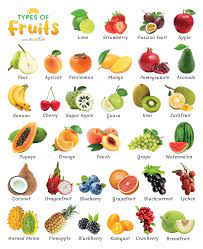
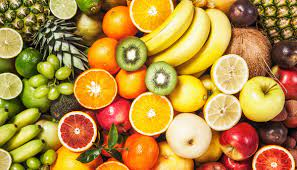
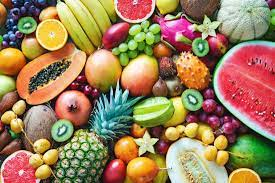
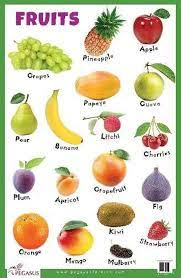
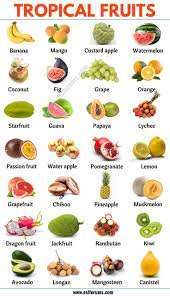
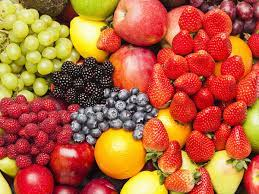
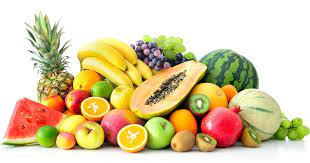
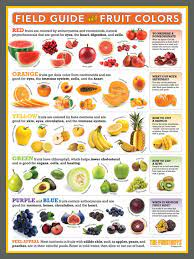
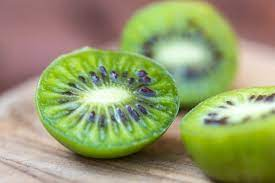
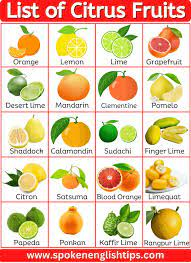

In [41]:
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME,'rg_i')))
image_elements = driver.find_elements(By.CLASS_NAME,'rg_i')
image_elements[0:10]
for i in image_elements[0:10]:
    print(i.get_attribute('src'))


In [ ]:
driver.close()

#Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.)
on www.flipkart.com and scrape following details for all the search results displayed 
on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”,
    “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”,
    “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. 
    Save your results in a dataframe and CSV.


In [20]:
driver=webdriver.Chrome()
driver.get('https://www.flipkart.com/')

In [ ]:
login_click = driver.find_element(By.XPATH,"/html/body/div[2]/div/div").click()

In [21]:
search_bar = driver.find_element(By.XPATH,"/html/body/div/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input")
search_bar.send_keys('pixel 4A')

In [22]:
search = driver.find_element(By.XPATH,"/html/body/div/div/div[1]/div[1]/div[2]/div[2]/form/div/button")
search.click()

In [23]:
BRAND_NAME=[]                   
SMARTPHONE_NAME=[]                 
COLOUR=[]
RAM=[]
STORAGE_ROM=[]
PRIMARY_CAMERA=[]
SECONDARY_CAMERA=[]
DISPLAY_SIZE=[]
BATTERY_CAPACITY=[]
PRICE=[]

In [24]:
PRODUCT_URL=[]
URL=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
for i in URL:
    PRODUCT_URL.append(i.get_attribute('href'))
    

In [25]:
len(PRODUCT_URL)

24

In [27]:

    for i in PRODUCT_URL:
        driver.get(i)
        time.sleep(3)
        
        
        try:
            NAME=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[5]/div/div[1]/div/img')
            BRAND_NAME.append(NAME.text)
        except NoSuchElementException:
            BRAND_NAME.append('-')

        try:
            PRODUCTNAME=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
            SMARTPHONE_NAME.append(PRODUCTNAME.text)
        except NoSuchElementException:
            SMARTPHONE_NAME.append('-')

        try:
            colour=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[1]/table/tbody/tr[4]/td[2]/ul/li')
            COLOUR.append(colour.text)
        except NoSuchElementException:
            COLOUR.append('-')
        try:
            read_more = driver.find_element(By.XPATH,'//button[@class="_2KpZ6l _1FH0tX"]')
            read_more.click()
        except NoSuchElementException:
            print("Exception occured while moving to next page")

        try:
            ram=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[4]/table/tbody/tr[2]/td[2]/ul/li')
            RAM.append(ram.text)
        except NoSuchElementException:
            RAM.append('-')

        try:
            rom=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[4]/table/tbody/tr[1]/td[2]/ul/li')
            STORAGE_ROM.append(rom.text)
        except NoSuchElementException:
            STORAGE_ROM.append('-')

        try:
            camera1=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[2]/td[2]/ul/li')
            PRIMARY_CAMERA.append(camera1.text)
        except NoSuchElementException:
            PRIMARY_CAMERA.append('-') 
            
        try:
            camera2=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[6]/td[2]/ul/li')
            SECONDARY_CAMERA.append(camera2.text)
        except NoSuchElementException:
            SECONDARY_CAMERA.append('-') 
            
            
        try:
            size=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[2]/table/tbody/tr[1]/td[2]/ul/li')
            DISPLAY_SIZE.append(size.text)
        except NoSuchElementException:
            DISPLAY_SIZE.append('-') 
            
            
        try:
            capacity=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[10]/table/tbody/tr/td[2]/ul/li')
            BATTERY_CAPACITY.append(capacity.text)
        except NoSuchElementException:
            BATTERY_CAPACITY.append('-') 
            
            
        try:
            RATE=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[4]/div[1]/div/div[1]')
            PRICE.append(RATE.text)
        except NoSuchElementException:
            PRICE.append('-')
            



In [28]:
df=pd.DataFrame()
df['BRAND NAME']=BRAND_NAME                  
df['SMARTPHONE NAME']=SMARTPHONE_NAME              
df['COLOR']=COLOUR
df['RAM']=RAM
df['STORAGE ROM']=STORAGE_ROM
df['PRIMARY CAMERA']=PRIMARY_CAMERA
df['SECONDARY CAMERA']=SECONDARY_CAMERA
df['DISPLAY SIZE']=DISPLAY_SIZE
df['BATTERY CAPACITY']=BATTERY_CAPACITY
df['PRICE']=PRICE
df

,BRAND NAME,SMARTPHONE NAME,COLOR,RAM,STORAGE ROM,PRIMARY CAMERA,SECONDARY CAMERA,DISPLAY SIZE,BATTERY CAPACITY,PRICE
0,,"realme C53 (Champion Black, 128 GB) (6 GB RAM)",Champion Black,6 GB,128 GB,108MP + 2MP,8MP Front Camera,17.12 cm (6.74 inch),5000 mAh,"₹10,499"
1,-,"realme C53 (Champion Gold, 64 GB) (6 GB RAM)",-,-,-,-,-,-,-,"₹8,999"
2,,"SAMSUNG Galaxy F15 5G (Jazzy Green, 128 GB) (...",Jazzy Green,6 GB,128 GB,50MP + 5MP + 2MP,13MP Front Camera,16.51 cm (6.5 inch),6000 mAh,"₹14,499"
3,,"SAMSUNG Galaxy F15 5G (Groovy Violet, 128 GB) ...",Groovy Violet,4 GB,128 GB,50MP + 5MP + 2MP,13MP Front Camera,16.51 cm (6.5 inch),6000 mAh,"₹12,999"
4,-,BlackZone WINX 4G (Gold),-,-,-,-,-,-,-,-
5,,Samsung Galaxy S21 FE 5G with Snapdragon 888 (...,Lavender,8 GB,128 GB,12MP + 12MP + 8MP (OIS),32MP Front Camera,16.26 cm (6.4 inch),4500 mAh,"₹29,999"
6,,"realme C53 (Champion Black, 128 GB) (6 GB RAM)",Champion Black,6 GB,128 GB,108MP + 2MP,8MP Front Camera,17.12 cm (6.74 inch),5000 mAh,"₹10,499"
7,-,"realme C53 (Champion Gold, 64 GB) (6 GB RAM)",-,-,-,-,-,-,-,"₹8,999"
8,,"SAMSUNG Galaxy F15 5G (Jazzy Green, 128 GB) (...",Jazzy Green,6 GB,128 GB,50MP + 5MP + 2MP,13MP Front Camera,16.51 cm (6.5 inch),6000 mAh,"₹14,499"
9,,"SAMSUNG Galaxy F15 5G (Groovy Violet, 128 GB) ...",Groovy Violet,4 GB,128 GB,50MP + 5MP + 2MP,13MP Front Camera,16.51 cm (6.5 inch),6000 mAh,"₹12,999"


In [29]:
df.to_csv("oneplus node.csv")

In [30]:
driver.close()

5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps. 

In [31]:
driver=webdriver.Chrome()
driver.get('https://www.google.co.in/maps')

In [33]:
City = input('Enter City name: ')
search = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input")
search.send_keys(City)
time.sleep(2)


Enter City name: harrow


In [34]:
search = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button")
search.click()

In [50]:
la=[]
try:
    area=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[23]/div[1]/div[2]/div[2]/div/div[2]/div[3]/button')
    la.append(area.text)
except NoSuchElementException:
    la.append('-') 



In [52]:
print("latitude, longitude:",la)

latitude, longitude: ['51.581802, -0.333275']


In [ ]:
driver.close()

6. Write a program to scrap all the available details of best gaming laptops from digit.in. 

In [55]:
driver=webdriver.Chrome()
driver.get('https://www.digit.in/')

In [ ]:
search=driver.find_element(By.ID,"woocommerce-product-search-field-1")
search.send_keys('laptop')

In [ ]:
BUTTON = driver.find_element(By.XPATH,'/html/body/div[2]/header/div/div[2]/div/div/div/div/button/i')
BUTTON.click()

In [56]:
Laptop_Name = []
Operating_sys = []
Display_size = []
Processor = []
grapic_pro=[]
Memory = []
storage_capacity = []
storage_type = []
price = []
url=[]

In [57]:
url=[]
URL=driver.find_elements(By.XPATH,'//h3[@class=" text-clamp text-clamp-2"]/a')
for i in URL:
    url.append(i.get_attribute('href'))
    

In [58]:
len(url)

12

In [59]:

for i in url:
        driver.get(i)
        time.sleep(5)
        
        
        try:
            NAME=driver.find_element(By.XPATH,'/html/body/div[2]/div[3]/div[1]/div/div/div/div/div[2]/div[1]/div[1]/h1')
            Laptop_Name.append(NAME.text)
        except NoSuchElementException:
            Laptop_Name.append('-')

        try:
            sys=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[1]/div/div/div/div/div[2]/div[4]/div[3]/div[2]/table/tbody/tr[2]/td/table/tbody/tr[1]/td/p')
            Operating_sys.append(sys.text)
        except NoSuchElementException:
            Operating_sys.append('-')

        try:
            d=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[1]/div/div/div/div/div[2]/div[4]/div[3]/div[2]/table/tbody/tr[4]/td/table/tbody/tr/td/p')
            Display_size.append(d.text)
        except NoSuchElementException:
            Display_size.append('-')
        
        try:
            p=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[1]/div/div/div/div/div[2]/div[4]/div[3]/div[2]/table/tbody/tr[10]/td/table/tbody/tr[5]/td/p')
            Processor.append(p.text)
        except NoSuchElementException:
            Processor.append('-')


        try:
            p=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[1]/div/div/div/div/div[2]/div[4]/div[3]/div[2]/table/tbody/tr[10]/td/table/tbody/tr[4]/td/p')
            grapic_pro.append(p.text)
        except NoSuchElementException:
            grapic_pro.append('-')
            
        try:
            ram=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[1]/div/div/div/div/div[2]/div[4]/div[3]/div[2]/table/tbody/tr[8]/td/table/tbody/tr[1]/td/p')
            Memory.append(ram.text)
        except NoSuchElementException:
            Memory.append('-')

        try:
            w=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[1]/div/div/div/div/div[2]/div[4]/div[3]/div[2]/table/tbody/tr[12]/td/table/tbody/tr[1]/td/p')
            storage_capacity.append(w.text)
        except NoSuchElementException:
            storage_capacity.append('-') 
            
                 
        try:
            sd=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[1]/div/div/div/div/div[2]/div[4]/div[3]/div[2]/table/tbody/tr[12]/td/table/tbody/tr[2]/td/p')
            storage_type.append(sd.text)
        except NoSuchElementException:
            storage_type.append('-') 
            
        try:
            RATE=driver.find_element(By.XPATH,'/html/body/div[2]/div[3]/div[1]/div/div/div/div/div[2]/div[3]/div/div[3]/div[1]/p')
            price.append(RATE.text)
        except NoSuchElementException:
            price.append('-')
            

    

In [60]:
df=pd.DataFrame()
df['LAPTOP NAME']=Laptop_Name 
df['OPERATING SYSTEM']=Operating_sys
df['DISPLAY SIZE']=Display_size
df['PROCESSOR']=Processor
df['GRAPIC PROCESSOR']=grapic_pro
df['MEMORY']=Memory
df['STORAGE CAPACITY']=storage_capacity
df['STORAGE TYPE']=storage_type
df['PRICE']=price
df

,LAPTOP NAME,OPERATING SYSTEM,DISPLAY SIZE,PROCESSOR,GRAPIC PROCESSOR,MEMORY,STORAGE CAPACITY,STORAGE TYPE,PRICE
0,Dell G15-5520 Gaming Laptop,-,-,-,-,-,-,-,
1,Acer Aspire 5 Gaming Laptop A514-56GM,-,-,-,-,-,-,-,
2,-,-,-,-,-,-,-,-,-
3,Acer Predator Helios Neo 16 Gaming Laptop (PHN...,-,-,-,-,-,-,-,
4,-,Windows 11 Home,16.1,13th Gen Intel Core i7-13700HX,NVIDIA GeForce RTX 4060,16 GB,512 GB,SSD,-
5,-,Windows 11 Home,15.6,AMD Ryzen 5-7535HS,NVIDIA GeForce RTX 2050,8 GB,512 GB,SSD,-
6,-,Windows 11 Home,15.6,12th Gen Intel Core i5-12450H,NVIDIA GeForce RTX 2050,16 GB,1 TB,SSD,-
7,-,Windows 11 Home,15.6,-,-,16 GB,1 TB,SSD,-
8,-,Windows 11 Home,15.6,AMD Ryzen 3-5300U,AMD Radeon,8 GB,512 GB,SSD,-
9,-,Windows 11,15.6,-,-,8 GB,512 GB,SSD,-


In [ ]:
driver.close()

7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: 
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [47]:
driver=webdriver.Chrome()

In [48]:
driver.get('https://www.forbes.com/')

In [49]:

opt_btn = driver.find_element(By.XPATH,"/html/body/div[1]/header/nav/div[1]/div[1]/div/div")
opt_btn.click()
time.sleep(3)



In [50]:

blns = driver.find_element(By.XPATH,"/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[1]")
blns.click()
time.sleep(3)



In [ ]:
#select world billionaire
bln_list = driver.find_element(By.XPATH,"/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[2]/div[3]/ul/li[1]")
bln_list.click()
time.sleep(4)

In [51]:
Rank = []
Person_Name = []
Net_worth = []
Age = []
Citizenship = []
Source = []
Industry = []

while(True):
        R=driver.find_elements(By.XPATH,'//div[1][@class="TableRow_cell__db-hv Table_cell__houv9"]')
        for i in R:
            rank=i.text
            Rank.append(rank)

        P=driver.find_elements(By.XPATH,'//div[2][@class="TableRow_cell__db-hv Table_cell__houv9"]')
        for i in P:
            name=i.text
            Person_Name.append(name)

        n=driver.find_elements(By.XPATH,'//div[3][@class="TableRow_cell__db-hv Table_cell__houv9"]')
        for i in n:
            w=i.text
            Net_worth.append(w)

        a=driver.find_elements(By.XPATH,'//div[4][@class="TableRow_cell__db-hv Table_cell__houv9"]')
        for i in a:
            age=i.text
            Age.append(age)

        c=driver.find_elements(By.XPATH,'//div[5][@class="TableRow_cell__db-hv Table_cell__houv9"]')
        for i in c:
            C=i.text
            Citizenship.append(C)

        S=driver.find_elements(By.XPATH,'//div[6][@class="TableRow_cell__db-hv Table_cell__houv9"]')
        for i in S:
            s=i.text
            Source.append(s)


        I=driver.find_elements(By.XPATH,'//div[7][@class="TableRow_cell__db-hv Table_cell__houv9"]')
        for i in I:
            N=i.text
            Industry.append(N)
            
        next_button = driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[2]/div[2]/div[1]/button[2]')
        next_button.click()
        break      
            

In [52]:
df=pd.DataFrame()
df['RANK']=Rank 
df['PERSON NAME']=Person_Name
df['NET WORTH']=Net_worth
df['AGE']=Age
df['CITIZENSHIP']=Citizenship
df['SOURCE']=Source
df['INDUSTRY']=Industry
df

,RANK,PERSON NAME,NET WORTH,AGE,CITIZENSHIP,SOURCE,INDUSTRY
0,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78,United States,Oracle,
4,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,
...,...,...,...,...,...,...,...
195,195,Jin Baofang,$9.6 B,70,China,Solar panels,
196,195,Luo Liguo & family,$9.6 B,67,China,Chemicals,
197,195,Marijke Mars,$9.6 B,58,United States,"Candy, pet food",
198,195,Pamela Mars,$9.6 B,62,United States,"Candy, pet food",


In [53]:
driver.close()

8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted 
from any YouTube Video.

In [54]:
driver=webdriver.Chrome()

In [55]:
driver.get('https://www.youtube.com/')

In [57]:
job_title = driver.find_element(By.XPATH,"/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/form/div[1]/div[1]/input")
job_title.send_keys('HANUMAN')

In [58]:
search = driver.find_element(By.XPATH,"/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/button/yt-icon/yt-icon-shape/icon-shape/div")
search.click()

In [59]:
search_1_VEDIO = driver.find_element(By.XPATH,"/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer[2]/div[3]/ytd-video-renderer[3]/div[1]/div/div[1]/div/h3/a/yt-formatted-string")
search_1_VEDIO.click()

In [72]:
COMMENT=[]
COMMENT_UPVOTE=[]
TIME=[]


CT=driver.find_elements(By.XPATH,'//ytd-expander[@class="style-scope ytd-comment-view-model"]')
CT[0:500]
for i in CT[0:500]:
    ct=i.text
    COMMENT.append(ct)
    
CU=driver.find_elements(By.XPATH,'//span[@class="style-scope ytd-comment-engagement-bar"]')
CU[0:500]
for i in CU[0:500]:
    cu=i.text
    COMMENT_UPVOTE.append(cu)
    
T=driver.find_elements(By.XPATH,'//SPAN[@id="published-time-text"]')
T[0:500]
for i in T[0:500]:
    time=i.text
    TIME.append(time)
    

In [74]:
COMMENT,COMMENT_UPVOTE,TIME



(['That “Ram” from hanumanji was EPIC!',
  'Who think Hanuman is better than Adipurush raise their hands..... ',
  'इस movie की story जिसने भी लिखी है, उसकी सोच को सलाम \n जय हनुमान.',
  '0:36 "rughu Nanadan Raghu Raghu Nandan" itna sunke alag hi sukun milta hai \n️\n️',
  'Goosebumps 1000% , cant wait anymore \n️\nJai Jai Bajrangbali ',
  'No words to this trailer purely goosebumps \n JAI SHREE RAM',
  'Hanuman g ka wo Ram kehna... Goosebumps agae only unke Ram Naam lene se hi... Who agrees with this.. Jai Shree Ram ',
  'Aaj hi dekh kar aa raha hu...saara theatre goosebumps aur Ram naam me duba hua tha.. सियावर राम चंद्र की जय ',
  'Jai Shree Ram',
  'Jay shree Ram ',
  "Oh My God!!! What a movie 🫡\n️\n️\n️ Adrenaline rush level \n The direction, story, background music , cinematography...performances by the cast all next level!!! The visuals of Hanuman \n️\n \nYou can't afford to miss a movie like this!!!! Tooooooo goooddd!!!!",
  'Abhi abhi dekh ke aya hu\nPure goosebumps',
  'SOUT

In [75]:
driver.close()

9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in 
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall 
reviews, privates from price, dorms from price, facilities and property description.

In [16]:
driver=webdriver.Chrome()

In [17]:
driver.get('https://www.hostelworld.com/')

In [ ]:
LOCATION = driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div[2]/div/div/div[2]/div/div[1]/div/div[1]/div/div/div[2]/input")
LOCATION.send_keys('LONDON')

In [17]:
search = driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div[2]/div/div/div[3]/div/div/button/span")
search.click()

In [18]:
hostel_name = []
distance = []
pvt_prices = []
dorms_price = []
rating = []
reviews = []
over_all = []
description = []


In [23]:
Url=driver.find_elements(By.XPATH,'//div[@class="property-name"]/span')
for i in Url:
    time.sleep(3)
    
   
    try:
        NAME=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[1]/div[3]/div[1]/div[1]/h1')
        hostel_name.append(NAME.text)
    except NoSuchElementException:
        hostel_name.append('-')
    
    try:
        d=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div[6]/div/div/div[2]/span')
        distance.append(d.text)
    except NoSuchElementException:
        distance.append('-')
        
    try:
        pp=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[12]/div/div/section/div/div/div[2]/div[1]/div[2]/div[1]/div[2]/div[2]/div/div[1]/div[2]/div[1]')
        pvt_prices.append(pp.text)
    except NoSuchElementException:
        pvt_prices.append('-')
        
    try:
        dp=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[12]/div/div/section/div/div/div[2]/div[2]/div[2]/div[1]/div[2]/div[1]/div/div[1]/div[2]/div[1]')
        dorms_price.append(dp.text)
    except NoSuchElementException:
        dorms_price.append('-')
        
    try:
        r=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div[5]/div[1]/div/div[1]/div[1]/div/div[1]/span[1]')
        rating.append(r.text)
    except NoSuchElementException:
        rating.append('-')
        
    try:
        re=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div[5]/div[1]/div/div[1]/div[1]/div/div[2]/span')
        reviews.append(re.text)
    except NoSuchElementException:
        reviews.append('-')
        
    try:
        o=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div[5]/div[1]/div/div[1]/div[1]/div/div[1]/span[2]')
        over_all.append(o.text)
    except NoSuchElementException:
        over_all.append('-')
         
    
    try:
        de=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div[4]/div/div[1]/p')
        description.append(de.text)
    except NoSuchElementException:
        description.append('-')
    
    
    
    
   

In [24]:
Hostel = pd.DataFrame({})
Hostel['Hostel Name'] = hostel_name
Hostel['Distance from City Centre'] = distance
Hostel['Ratings'] = rating
Hostel['Total Reviews'] = reviews
Hostel['Overall Reviews'] = over_all
Hostel['Privates from Price'] = pvt_prices
Hostel['Dorms from Price'] = dorms_price
Hostel['Facility/Description'] = description
Hostel

,Hostel Name,Distance from City Centre,Ratings,Total Reviews,Overall Reviews,Privates from Price,Dorms from Price,Facility/Description
0,-,-,-,-,-,-,-,-
1,-,-,-,-,-,-,-,-
2,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-
4,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...
58,-,-,-,-,-,-,-,-
59,-,-,-,-,-,-,-,-
60,-,-,-,-,-,-,-,-
61,-,-,-,-,-,-,-,-


In [ ]:
Hostel.to_csv("London_Hostels.csv")

In [ ]:
driver.close()